In [ ]:
'''

Thresholding:
    - Thresholding is the simplest method of segmenting images.
    - From a grayscale image, thresholding can be used to create binary images. 
    - In thresholding, we convert an image from color or grayscale into a binary image,
    - Thresholding is the binarization of an image. In general, we seek to convert a grayscale image to a binary image, 
      where the pixels are either 0 or 255.
    

In [ ]:
'''
How Thresholding Works:
    - where we change the pixels of an image to make the image easier to analyze.
    - The simplest thresholding methods replace each pixel in an image with a black pixel if the image intensity I(i,j) is less 
      than some fixed constant T .
    - 

In [ ]:
'''
Thresholding Types
        - Simple Threshold
        - Adaptive Threshold
        - OTSU Binarization

### Simple Threshold
    - If the pixel value is greater than a threshold value, it is assigned one value (maybe white), else it is assigned 
     another value (maybe black).

In [ ]:
#Syntax:
cv2.threshold(img, thresh_value, maxVal, style)

#Example:
ret, img_binary = cv2.threshold(img,100, 255, cv2.THRESH_BINARY)

# A simple threshold function pseudo code 
if pixel_value > thresh
  pixel_value = maxValue
else
  pixel_value = 0

### Simple Threshold Types
    - cv.THRESH_BINARY
    - cv.THRESH_BINARY_INV
    - cv.THRESH_TRUNC
    - cv.THRESH_TOZERO
    - cv.THRESH_TOZERO_INV

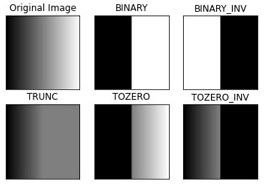

In [ ]:
# Binary Threshold
if src(x,y) > thresh
  dst(x,y) = maxValue
else
  dst(x,y) = 0

In [ ]:
# Inverse Binary Threshold

if src(x,y) > thresh
  dst(x,y) = 0
else
  dst(x,y) = maxValue

In [ ]:
# Truncate Threshold

if src(x,y) > thresh
  dst(x,y) = thresh
else
  dst(x,y) = src(x,y)

In [ ]:
# Threshold to Zero
if src(x,y) > thresh
  dst(x,y) = src(x,y)
else
  dst(x,y) = 0

In [ ]:
# Inverted Threshold to Zero
if src(x,y) > thresh
  dst(x,y) = 0
else
  dst(x,y) = src(x,y)

### Adaptive thresholding

In [ ]:
'''
Threshold value is calculated for smaller regions and therefore, there will be different threshold values for different regions

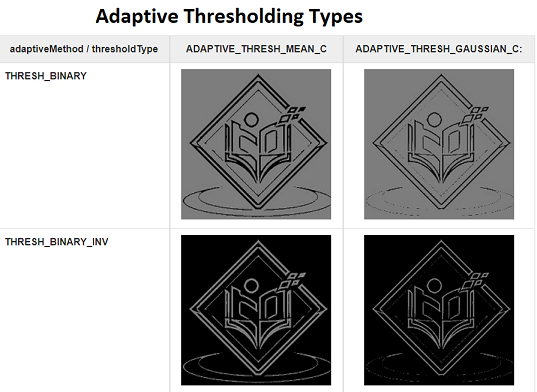

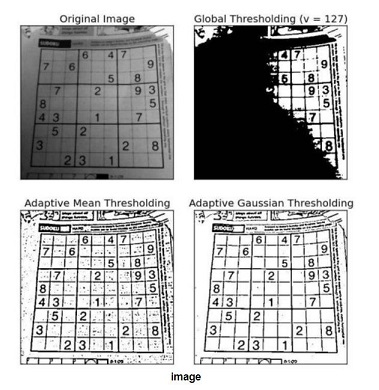

In [ ]:
'''
Note :

Simple Thresholding : the threshold value is global.
Adaptive Thresholding  : Threshold value is calculated for smaller regions and therefore

### Otsu's Binarization
    - In global thresholding, we used an arbitrary chosen value as a threshold. In contrast, Otsu's method avoids having to choose a value and determines it automatically.

(-0.5, 943.5, 755.5, -0.5)

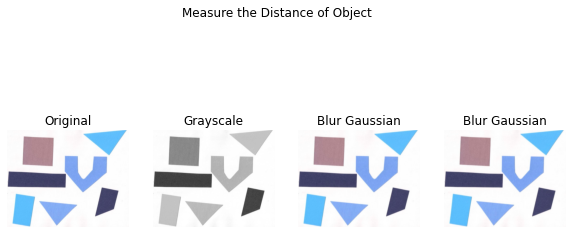

In [3]:
# Simple Example for Thresholding

import numpy as np
import cv2

img = cv2.imread("1.jpg")

# Use the cvtColor() function to grayscale the image
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# blur the image to denoise
blur_gaussian = cv2.GaussianBlur(img,(5,5),1)

# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blur_gaussian, bins=256, range=(0.0, 1.0))

# create a mask based on the threshold
t = 0.8
binary_mask = blur_gaussian < t

import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3,ax4) = plt.subplots(1, 4,figsize=(10,5))
fig.suptitle('Measure the Distance of Object')
ax1.imshow(img)
ax1.set_title("Original")
ax1.axis("off")

ax2.imshow(gray_image,cmap="gray")
ax2.set_title("Grayscale")
ax2.axis("off")

ax3.imshow(blur_gaussian,cmap="gray")
ax3.set_title("Blur Gaussian")
ax3.axis("off")

ax4.imshow(blur_gaussian,cmap="gray")
ax4.set_title("Blur Gaussian")
ax4.axis("off")

Gray Image: (756, 944)
Blurred Image Shape (756, 944)
Binary Mask Shape: (756, 944)


(-0.5, 943.5, 755.5, -0.5)

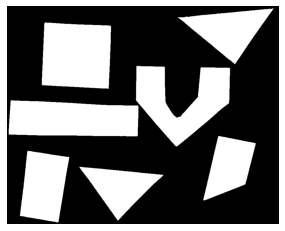

In [41]:
import skimage.io
import skimage.color
import skimage.filters
import numpy as np

# load the image
image = skimage.io.imread("1.jpg")

# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

print("Gray Image:",gray_image.shape)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

print("Blurred Image Shape",blurred_image.shape)

# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))

# create a mask based on the threshold
t = 0.8
binary_mask = blurred_image < t

print("Binary Mask Shape:",binary_mask.shape)

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap='gray')
plt.axis("off")

Gray Image: (756, 944)


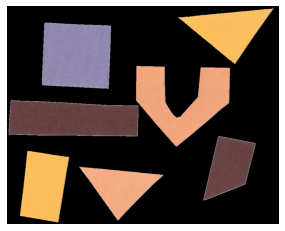

In [44]:
import skimage.io
import skimage.color
import skimage.filters
import numpy as np

# load the image
image = skimage.io.imread("1.jpg")

# use the binary_mask to select the "interesting" part of the image
selection = np.zeros_like(image)

# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

print("Gray Image:",gray_image.shape)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)

# create a mask based on the threshold
t = 0.8
binary_mask = blurred_image < t

selection[binary_mask] = image[binary_mask]

fig, ax = plt.subplots()
plt.imshow(selection)
plt.axis("off")
plt.show()